RUSHIKESH SANJIV TANKSALE.
712222014 Deep Learning 2022-23 SEM II.

Epoch 1/50, Loss: 0.382190
Epoch 2/50, Loss: 0.379003
Epoch 3/50, Loss: 0.376091
Epoch 4/50, Loss: 0.373415
Epoch 5/50, Loss: 0.370942
Epoch 6/50, Loss: 0.368642
Epoch 7/50, Loss: 0.366492
Epoch 8/50, Loss: 0.364468
Epoch 9/50, Loss: 0.362555
Epoch 10/50, Loss: 0.360736
Epoch 11/50, Loss: 0.358999
Epoch 12/50, Loss: 0.357334
Epoch 13/50, Loss: 0.355732
Epoch 14/50, Loss: 0.354185
Epoch 15/50, Loss: 0.352688
Epoch 16/50, Loss: 0.351236
Epoch 17/50, Loss: 0.349824
Epoch 18/50, Loss: 0.348449
Epoch 19/50, Loss: 0.347108
Epoch 20/50, Loss: 0.345799
Epoch 21/50, Loss: 0.344519
Epoch 22/50, Loss: 0.343267
Epoch 23/50, Loss: 0.342042
Epoch 24/50, Loss: 0.340841
Epoch 25/50, Loss: 0.339664
Epoch 26/50, Loss: 0.338509
Epoch 27/50, Loss: 0.337377
Epoch 28/50, Loss: 0.336265
Epoch 29/50, Loss: 0.335173
Epoch 30/50, Loss: 0.334101
Epoch 31/50, Loss: 0.333048
Epoch 32/50, Loss: 0.332013
Epoch 33/50, Loss: 0.330996
Epoch 34/50, Loss: 0.329996
Epoch 35/50, Loss: 0.329012
Epoch 36/50, Loss: 0.328045
E

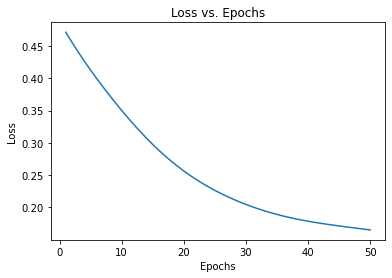

Optimizer: adam, Accuracy: 0.8000


In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

class FeedForwardNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred))

    def compute_gradients(self, X, y_true):
        m = X.shape[0]
        y_pred = self.forward(X)
        dZ2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.a1 * (1 - self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0) / m
        return dW1, db1, dW2, db2

    def fit(self, X, y, optimizer='gd', learning_rate=0.01, epochs=100, batch_size=32, gamma=0.9, epsilon=1e-8, beta1=0.9, beta2=0.999):
        m = X.shape[0]

        if optimizer not in ['gd', 'mini-batch-gd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']:
            raise ValueError("Invalid optimizer specified.")

        if optimizer in ['momentum', 'nesterov']:
            self.velocity_W1 = np.zeros_like(self.W1)
            self.velocity_b1 = np.zeros_like(self.b1)
            self.velocity_W2 = np.zeros_like(self.W2)
            self.velocity_b2 = np.zeros_like(self.b2)

        if optimizer == 'adagrad':
            self.cache_W1 = np.zeros_like(self.W1)
            self.cache_b1 = np.zeros_like(self.b1)
            self.cache_W2 = np.zeros_like(self.W2)
            self.cache_b2 = np.zeros_like(self.b2)

        if optimizer == 'rmsprop':
            self.cache_W1 = np.zeros_like(self.W1)
            self.cache_b1 = np.zeros_like(self.b1)
            self.cache_W2 = np.zeros_like(self.W2)
            self.cache_b2 = np.zeros_like(self.b2)

        if optimizer == 'adam':
            self.m_W1 = np.zeros_like(self.W1)
            self.m_b1 = np.zeros_like(self.b1)
            self.m_W2 = np.zeros_like(self.W2)
            self.m_b2 = np.zeros_like(self.b2)
            self.v_W1 = np.zeros_like(self.W1)
            self.v_b1 = np.zeros_like(self.b1)
            self.v_W2 = np.zeros_like(self.W2)
            self.v_b2 = np.zeros_like(self.b2)
            self.t = 0
            self.losses = []

        for epoch in range(epochs):
            if optimizer == 'mini-batch-gd':
                indices = np.random.permutation(m)
                for i in range(0, m, batch_size):
                    batch_indices = indices[i:i+batch_size]
                    X_batch, y_batch = X[batch_indices], y[batch_indices]
                    dW1, db1, dW2, db2 = self.compute_gradients(X_batch, y_batch)
                    self.W1 -= learning_rate * dW1
                    self.b1 -= learning_rate * db1
                    self.W2 -= learning_rate * dW2
                    self.b2 -= learning_rate * db2
            else:
                dW1, db1, dW2, db2 = self.compute_gradients(X, y)
                if optimizer == 'gd':
                    self.W1 -= learning_rate * dW1
                    self.b1 -= learning_rate * db1
                    self.W2 -= learning_rate * dW2
                    self.b2 -= learning_rate * db2
                elif optimizer == 'momentum':
                    self.velocity_W1 = gamma * self.velocity_W1 + learning_rate * dW1
                    self.velocity_b1 = gamma * self.velocity_b1 + learning_rate * db1
                    self.velocity_W2 = gamma * self.velocity_W2 + learning_rate * dW2
                    self.velocity_b2 = gamma * self.velocity_b2 + learning_rate * db2
                    self.W1 -= self.velocity_W1
                    self.b1 -= self.velocity_b1
                    self.W2 -= self.velocity_W2
                    self.b2 -= self.velocity_b2
                elif optimizer == 'nesterov':
                    self.velocity_W1 = gamma * self.velocity_W1 + learning_rate * dW1
                    self.velocity_b1 = gamma * self.velocity_b1 + learning_rate * db1
                    self.velocity_W2 = gamma * self.velocity_W2 + learning_rate * dW2
                    self.velocity_b2 = gamma * self.velocity_b2 + learning_rate * db2
                    self.W1 -= gamma * self.velocity_W1 + learning_rate * dW1
                    self.b1 -= gamma * self.velocity_b1 + learning_rate * db1
                    self.W2 -= gamma * self.velocity_W2 + learning_rate * dW2
                    self.b2 -= gamma * self.velocity_b2 + learning_rate * db2
                elif optimizer == 'adagrad':
                    self.cache_W1 += dW1**2
                    self.cache_b1 += db1**2
                    self.cache_W2 += dW2**2
                    self.cache_b2 += db2**2
                    self.W1 -= learning_rate * dW1 / (np.sqrt(self.cache_W1) + epsilon)
                    self.b1 -= learning_rate * db1 / (np.sqrt(self.cache_b1) + epsilon)
                    self.W2 -= learning_rate * dW2 / (np.sqrt(self.cache_W2) + epsilon)
                    self.b2 -= learning_rate * db2 / (np.sqrt(self.cache_b2) + epsilon)
                elif optimizer == 'rmsprop':
                    self.cache_W1 = gamma * self.cache_W1 + (1 - gamma) * dW1**2
                    self.cache_b1 = gamma * self.cache_b1 + (1 - gamma) * db1**2
                    self.cache_W2 = gamma * self.cache_W2 + (1 - gamma) * dW2**2
                    self.cache_b2 = gamma * self.cache_b2 + (1 - gamma) * db2**2
                    self.W1 -= learning_rate * dW1 / (np.sqrt(self.cache_W1) + epsilon)
                    self.b1 -= learning_rate * db1 / (np.sqrt(self.cache_b1) + epsilon)
                    self.W2 -= learning_rate * dW2 / (np.sqrt(self.cache_W2) + epsilon)
                    self.b2 -= learning_rate * db2 / (np.sqrt(self.cache_b2) + epsilon)
                elif optimizer == 'adam':
                    self.t += 1
                    self.m_W1 = beta1 * self.m_W1 + (1 - beta1) * dW1
                    self.m_b1 = beta1 * self.m_b1 + (1 - beta1) * db1
                    self.m_W2 = beta1 * self.m_W2 + (1 - beta1) * dW2
                    self.m_b2 = beta1 * self.m_b2 + (1 - beta1) * db2
                    self.v_W1 = beta2 * self.v_W1 + (1 - beta2) * dW1**2
                    self.v_b1 = beta2 * self.v_b1 + (1 - beta2) * db1**2
                    self.v_W2 = beta2 * self.v_W2 + (1 - beta2) * dW2**2
                    self.v_b2 = beta2 * self.v_b2 + (1 - beta2) * db2**2
                    m_W1_hat = self.m_W1 / (1 - beta1**self.t)
                    m_b1_hat = self.m_b1 / (1 - beta1**self.t)
                    m_W2_hat = self.m_W2 / (1 - beta1**self.t)
                    m_b2_hat = self.m_b2 / (1 - beta1**self.t)
                    v_W1_hat = self.v_W1 / (1 - beta2**self.t)
                    v_b1_hat = self.v_b1 / (1 - beta2**self.t)
                    v_W2_hat = self.v_W2 / (1 - beta2**self.t)
                    v_b2_hat = self.v_b2 / (1 - beta2**self.t)
                    self.W1 -= learning_rate * m_W1_hat / (np.sqrt(v_W1_hat) + epsilon)
                    self.b1 -= learning_rate * m_b1_hat / (np.sqrt(v_b1_hat) + epsilon)
                    self.W2 -= learning_rate * m_W2_hat / (np.sqrt(v_W2_hat) + epsilon)
                    self.b2 -= learning_rate * m_b2_hat / (np.sqrt(v_b2_hat) + epsilon)

            loss = self.compute_loss(y, self.forward(X))
            if optimizer == 'adam':
                self.losses.append(loss)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

    def plot_loss(self):
        if hasattr(self, 'losses'):
            plt.plot(range(1, len(self.losses) + 1), self.losses)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Loss vs. Epochs')
            plt.show()

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Training the FeedForward Neural Network using various optimizers
optimizers = ['gd', 'mini-batch-gd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']

for optimizer in optimizers:
    nn = FeedForwardNeuralNetwork(input_size=4, hidden_size=10, output_size=3)
    nn.fit(X_train, y_train, optimizer=optimizer, learning_rate=0.01, epochs=50)
    nn.plot_loss()
    y_pred = nn.predict(X_test)
    accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
    print(f"Optimizer: {optimizer}, Accuracy: {accuracy:.4f}")
